Task4_0603. train.csv 파일로 생존자 예측 모델 생성을 위한 분석용 데이터 셋을 작성하세요.

In [3]:
from google.colab import files
file_uploaded=files.upload()

Saving train.csv to train.csv


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [124]:
file_path='train.csv'
df=pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 1. 결측치 확인 및 불필요 변수 삭제

In [126]:
# 결측치 확인 및 불필요 변수 삭제
# 1-1. 결측치 확인
print(df.isnull().sum())
    # age 177 - 수정 필요
    # cabin - 변수 삭제 대상
    # embarked - (06.04) embarked도 수정해서 사용해보기

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [215]:
df1=df.copy()

In [216]:
# 1-2. 분석에 불필요한 데이터 열 삭제
df1.drop(columns=['Ticket', 'Cabin'], inplace=True)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


## 2. 결측치 처리 (Age)

In [217]:
# 2-1. Age 결측치 채우기 위해 정보 확인
print("<< Age Info >> \n", df1['Age'].describe())

<< Age Info >> 
 count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64


In [218]:
# 2-2. Age 결측치 처리를 위해 "Name"에서 title 구분하여 별도 열에 추가
df1['Name'].unique() # 구성 : firstname , title . 기타 호칭
df1_name_split=df['Name'].str.split(" ", expand=True).head() # Name에서 title만 따로 빼서 열 저장

In [219]:
df1_name_split.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"Braund,",Mr.,Owen,Harris,None,None,None,None,None,None,None,None,None,None
1,"Cumings,",Mrs.,John,Bradley,(Florence,Briggs,Thayer),None,None,None,None,None,None,None
2,"Heikkinen,",Miss.,Laina,None,None,None,None,None,None,None,None,None,None,None
3,"Futrelle,",Mrs.,Jacques,Heath,(Lily,May,Peel),None,None,None,None,None,None,None
4,"Allen,",Mr.,William,Henry,None,None,None,None,None,None,None,None,None,None


In [220]:
# 따로 뽑은 title을 작업 데이터에 붙이기
df1['Title']=df1_name_split[1]

In [221]:
df1['Title'].fillna('Unknown', inplace=True) # title 없는 케이스는 "unknown" 처리

In [222]:
df1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Unknown
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Unknown
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Unknown
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Unknown


In [223]:
# 2-3. Age 결측치 처리 기준 정리 :

# Title, sex 기준으로 age 결측치 처리 기준
# sex 기준 age mean:
print("<< sex 기준 age mean >> \n", df1.groupby('Sex')['Age'].mean())

# title 기준 age mean:
print("\n<< title 기준 age mean >> \n", df1.groupby('Title')['Age'].mean())

# title이 unknown인 경우에는 sex 기준으로 mean값 넣어주기

<< sex 기준 age mean >> 
 Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

<< title 기준 age mean >> 
 Title
Miss.      26.000000
Mr.        28.500000
Mrs.       36.500000
Unknown    29.688533
Name: Age, dtype: float64


In [224]:
# 2-4. age 결측치 처리:
age_null_mask=df['Age'].isnull()

df1.loc[age_null_mask & (df1['Title']=='Miss.'), 'Age']=26.0
df1.loc[age_null_mask & (df1['Title']=='Mr.'), 'Age']=28.0
df1.loc[age_null_mask & (df1['Title']=='Mrs.'), 'Age']=36.0
df1.loc[age_null_mask & (df1['Title']=='Unknown') & (df1['Sex']=='female'), 'Age']=27.9
df1.loc[age_null_mask & (df1['Title']=='Unknown') & (df1['Sex']=='male'), 'Age']=30.7

In [225]:
# 결측치 처리 완료 확인 :
print(df1.isnull().sum()) # 위에서 처리한 값이 의도대로 들어갔는지는 어떻게 확인하는게 효율적인지?

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Title          0
dtype: int64


### 2-2. 결측치 처리 (Embarked)

In [226]:
# Embarked의 구성 요소 확인
print(df1['Embarked'].unique())
print()
print(df1['Embarked'].info())
print()
print(df1['Embarked'].describe())

['S' 'C' 'Q' nan]

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Embarked
Non-Null Count  Dtype 
--------------  ----- 
889 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB
None

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


In [227]:
# Embarked C, S, Q  그룹으로 데이터 구분해서 개별 freuqency 확인, null값 2개는 most frequent 꺼로 대체
print(df1.groupby('Embarked').count())
# S: 644, C:168, Q:77

          PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Fare  \
Embarked                                                                      
C                 168       168     168   168  168  168    168    168   168   
Q                  77        77      77    77   77   77     77     77    77   
S                 644       644     644   644  644  644    644    644   644   

          Title  
Embarked         
C           168  
Q            77  
S           644  


In [228]:
# Embarked null값 대체 : 2개 모두 S로
df1['Embarked']=df1['Embarked'].fillna('S')

In [229]:
# 제대로 fill in 되었는지 확인
print(df1.groupby('Embarked').count())

          PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Fare  \
Embarked                                                                      
C                 168       168     168   168  168  168    168    168   168   
Q                  77        77      77    77   77   77     77     77    77   
S                 646       646     646   646  646  646    646    646   646   

          Title  
Embarked         
C           168  
Q            77  
S           646  


In [230]:
# 전체 결측치 확인 :
df1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

### 3-1. 데이터 수정/범주형 변수 생성

In [ ]:
# 3. 데이터 수정/범위 잡기
# sibsp, parch를 하나로 합치고
# age group 생성
# fare group 생성

In [231]:
# 3-1. sibsp, parch를 하나로 합치기
df1['Family_num']=df1['SibSp']+df1['Parch']+1 # 본인 포함시키기 위해

In [145]:
# # 3-2. age group 만들기
# bins=[0,5,12,19,30,40,50,60,100]
# labels=['Infant','Child','Teenager','20s','30s','40s','50s','60s or above']
# df1['Age_group']=pd.cut(df1['Age'],bins=bins, labels=labels)

In [233]:
# (06.04 피벗 : Age, Sex, Survived)
df1_age=df1.pivot_table(index='Sex',columns='Age_group',values='Survived',aggfunc='mean')
df1_age
# 50대+60대 이상 합치기

In [214]:
df1['Age_group'].value_counts()

Age_group
20s             298
30s             279
Teenager         95
40s              86
Infant           44
50s              42
Child            25
60s or above     22
Name: count, dtype: int64

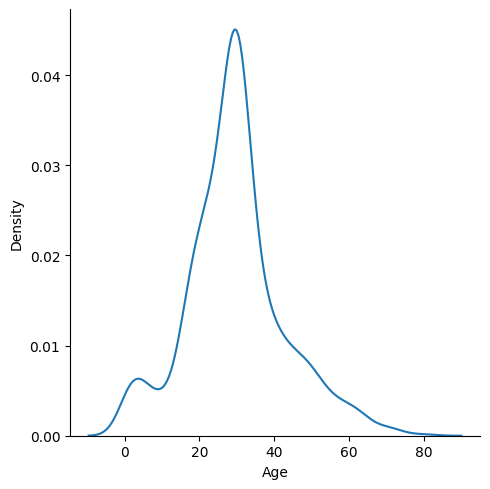

In [213]:
# (06.04 Age 분포도 확인)
# seaborn으로 분포도 그래프로 fare 확인
import seaborn as sns
sns.displot(data=df1,x='Age',kind='kde')

In [306]:
df1_fare=df1.pivot_table(index='Age_group',columns='Sex',values='Survived',aggfunc='mean')
df1_fare

Sex,female,male
Age_group,,
Infant,0.761905,0.652174
Child,0.272727,0.428571
Teenager,0.755556,0.123077
20s,0.723881,0.154362
30s,0.836364,0.174107
40s,0.677419,0.218182
50s or above,0.941176,0.127660


In [307]:
# (06.04 수정) 3-2. age group 만들기
bins=[0,5,12,19,25,30,35,40,50,100]
labels=['Infant','Child','Teenager','early 20s','late 20s','early 30s','late 30s','40s','50s or above']
df1['Age_group']=pd.cut(df1['Age'],bins=bins, labels=labels)
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_num,Age_group,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,2,early 20s,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,2,late 30s,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,1,late 20s,Low_medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,2,early 30s,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,1,early 30s,Low_medium


In [252]:
# (06.04 수정) 3.3 fare group
# 06.03 기준 Fare_group 상태:
df1['Fare_group'].value_counts()

Fare_group
Low_medium     227
High           225
Low            223
Medium-high    216
Name: count, dtype: int64

In [300]:
df1_fare=df1.pivot_table(index='Fare_group',values='Survived',aggfunc='mean')
df1_fare

,Survived
Fare_group,
Low,0.199405
Medium,0.425397
High,0.587500


In [269]:
df1_fare=df1.pivot_table(index='Fare_group',columns='Pclass',values='Survived',aggfunc='mean')
df1_fare

Pclass,1,2,3
Fare_group,,,
Low,0.000000,0.000000,0.208531
Low_medium,NaN,0.383721,0.248227
Medium-high,0.520833,0.600000,0.326531
High,0.685185,0.545455,0.195122


In [236]:
# 3-3. fare group 만들기
print(df1['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


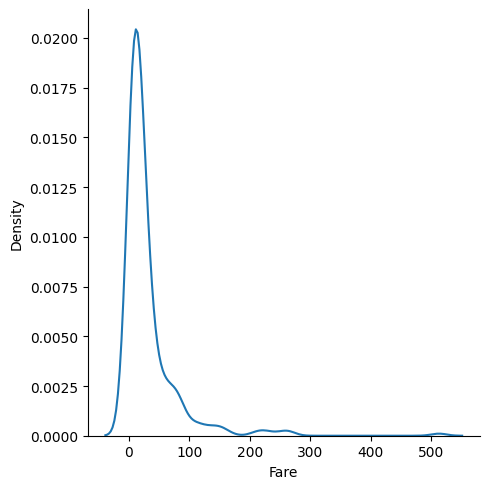

In [237]:
# seaborn으로 분포도 그래프로 fare 확인
import seaborn as sns
sns.displot(data=df1,x='Fare',kind='kde')

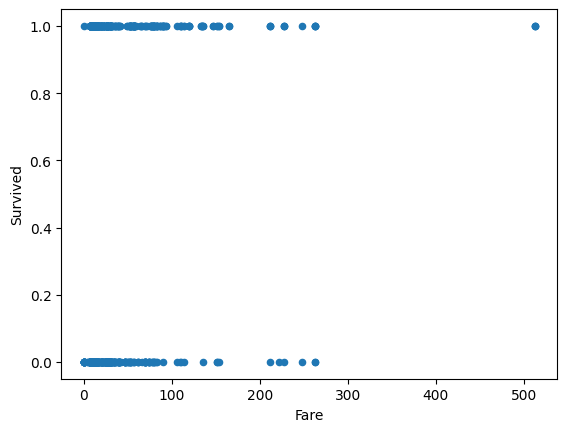

In [268]:
# (06.04 수정) survived vs fare scatter plot
df1.plot.scatter(x='Fare',y='Survived')
plt.show()

In [301]:
# fare group 생성 코드
fare_bins=[0,7.9,14.5,31.0,600]
fare_labels=['Low','Low_medium','Medium-high','High']
df1['Fare_group']=pd.cut(df1['Fare'], bins=fare_bins, labels=fare_labels, right=False)
# fare==0.0 인 15명 때문에 좌측 edge 값 포함하기 위해 right=False 넣어줌

In [284]:
# # (06.04 수정) fare group 생성 코드
# fare_bins=[0,10,30,600]
# fare_labels=['Low','Medium','High']
# df1['Fare_group']=pd.cut(df1['Fare'], bins=fare_bins, labels=fare_labels, right=False)
# # fare==0.0 인 15명 때문에 좌측 edge 값 포함하기 위해 right=False 넣어줌

In [372]:
df1_F_pivot=df2.pivot_table(index='Pclass',columns='Sex',values='Survived',aggfunc='mean')
df1_F_pivot

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [371]:
df1_F_pivot=df2.pivot_table(index='Age_group', columns='Pclass',values='Survived',aggfunc='mean')
df1_F_pivot

Pclass,1,2,3
Age_group,,,
Infant,0.666667,1.000000,0.571429
Child,1.000000,1.000000,0.200000
Teenager,0.823529,0.500000,0.266667
early 20s,0.761905,0.400000,0.197674
late 20s,0.785714,0.454545,0.410000
early 30s,0.547619,0.416667,0.141791
late 30s,0.678571,0.375000,0.130435
40s,0.567568,0.526316,0.066667
50s or above,0.461538,0.200000,0.100000


In [302]:
df1['Fare_group'].unique()

['Low', 'High', 'Low_medium', 'Medium-high']
Categories (4, object): ['Low' < 'Low_medium' < 'Medium-high' < 'High']

In [303]:
# Fare_group에 결측치 확인
df1[df1.Fare_group.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_num,Age_group,Fare_group


### 3-2. 파생변수 생성

In [ ]:
# 파생변수 목록:
# 1. sex x age (d)
# 2. sex x pclass (d)
# 3. sex x Family_num
# 4. sex x age x pclass
# 5. pclass x fare_group (d)
# 6. pclass x age (d)

In [308]:
df2=df1.copy()

In [309]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_num,Age_group,Fare_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,2,early 20s,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,2,late 30s,High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,1,late 20s,Low_medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,2,early 30s,High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,1,early 30s,Low_medium


In [310]:
df2['Age_group'].unique()

['early 20s', 'late 30s', 'late 20s', 'early 30s', '50s or above', 'Infant', 'Teenager', 'Child', '40s']
Categories (9, object): ['Infant' < 'Child' < 'Teenager' < 'early 20s' ... 'early 30s' < 'late 30s' <
                         '40s' < '50s or above']

In [68]:
# # 1. sex x age_group 만들기 위해 하기 함수로 적용
# def sex_age(row):
#     Sex=row['Sex']
#     Age_group=row['Age_group']
#     if Sex=='male': # 남성
#         if Age_group=='20s':
#             return 'male_20s'
#         elif Age_group=='30s':
#             return 'male_30s'
#         elif Age_group=='40s':
#             return 'male_40s'
#         elif Age_group=='50s':
#             return 'male_50s'
#         elif Age_group=='60s or above':
#             return 'male_60s or above'
#         elif Age_group=='Infant':
#             return 'male_Infant'
#         elif Age_group=='Teenager':
#             return 'male_Teenager'
#         else:
#             return 'male_Child'
#     else:
#         if Age_group=='20s':
#             return 'female_20s'
#         elif Age_group=='30s':
#             return 'female_30s'
#         elif Age_group=='40s':
#             return 'female_40s'
#         elif Age_group=='50s':
#             return 'female_50s'
#         elif Age_group=='60s or above':
#             return 'female_60s or above'
#         elif Age_group=='Infant':
#             return 'female_Infant'
#         elif Age_group=='Teenager':
#             return 'female_Teenager'
#         else:
#             return 'female_Child'

In [85]:
# # 함수 적용하여 새 column에 파생변수 저장
# df2['Sex_by_Age_group']=df2.apply(sex_age,axis=1)
# df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_num,Age_group,Fare_group,Sex_by_Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,2,20s,Low,male_20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,2,30s,High,female_30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,1,20s,Low_medium,female_20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,2,30s,High,female_30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,1,30s,Low_medium,male_30s


In [322]:
# # 2. sex x pclass
# def sex_pclass(row):
#     Sex=row['Sex']
#     Pclass=row['Pclass']
#     if Sex=='male': # 남성 x 선실 등급
#         if Pclass=='1':
#             return 'male_class1'
#         elif Pclass=='2':
#             return 'male_class2'
#         else:
#             return 'male_class3'

#     else: # 여성 x 선실 등급
#         if Pclass=='1':
#             return 'female_class1'
#         elif Pclass=='2':
#             return 'female_class2'
#         else:
#             return 'female_class3'

In [323]:
# # # 함수 적용하여 새 column에 파생변수 저장
# df2['Sex_by_Pclass']=df2.apply(sex_pclass,axis=1)
# df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_num,Age_group,Fare_group,Sex_by_Pclass
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,2,early 20s,Low,male_class3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,2,late 30s,High,female_class3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,1,late 20s,Low_medium,female_class3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,2,early 30s,High,female_class3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,1,early 30s,Low_medium,male_class3


In [311]:
df2['Fare_group'].unique()

['Low', 'High', 'Low_medium', 'Medium-high']
Categories (4, object): ['Low' < 'Low_medium' < 'Medium-high' < 'High']

In [355]:
# 5. pclass x fare_group
def pclass_fare_group(row):
    Pclass=row['Pclass']
    Fare_group=row['Fare_group']

    if Pclass=='1':
        if Fare_group=='Low':
            return 'class1_Low'
        elif Fare_group=='Low_medium':
            return 'class1_Low_medium'
        elif Fare_group=='Medium-high':
            return 'class1_medium_high'
        else:
            return 'class1_High'
    elif Pclass=='2':
        if Fare_group=='Low':
            return 'class2_Low'
        elif Fare_group=='Low_medium':
            return 'class2_Low_medium'
        elif Fare_group=='Medium-high':
            return 'class2_medium_high'
        else:
            return 'class2_High'
    else:
        if Fare_group=='Low':
            return 'class3_Low'
        elif Fare_group=='Low_medium':
            return 'class3_Low_medium'
        elif Fare_group=='Medium-high':
            return 'class3_medium_high'
        else:
            return 'class3_High'

In [356]:
# # 함수 적용하여 새 column에 파생변수 저장
df2['Pclass_by_Fare']=df2.apply(pclass_fare_group,axis=1)
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_num,Age_group,Fare_group,Sex_by_Pclass,Pclass_by_Age,Pclass_by_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,2,early 20s,Low,male_class3,class3_early 20s,class3_Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,2,late 30s,High,female_class3,class3_late 30s,class3_High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,1,late 20s,Low_medium,female_class3,class3_late 20s,class3_Low_medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,2,early 30s,High,female_class3,class3_early 30s,class3_High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,1,early 30s,Low_medium,male_class3,class3_early 30s,class3_Low_medium


In [337]:
df2['Age_group'].unique()

['early 20s', 'late 30s', 'late 20s', 'early 30s', '50s or above', 'Infant', 'Teenager', 'Child', '40s']
Categories (9, object): ['Infant' < 'Child' < 'Teenager' < 'early 20s' ... 'early 30s' < 'late 30s' <
                         '40s' < '50s or above']

In [338]:
# # 6. pclass x age
# def age_pclass(row):
#     Pclass=row['Pclass']
#     Age_group=row['Age_group']
#     if Pclass=='1': # 1등급 x age
#         if Age_group=='early 20s':
#             return 'class1_early 20s'
#         elif Age_group=='late 20s':
#             return 'class1_late 20s'
#         elif Age_group=='early 30s':
#             return 'class1_early 30s'
#         elif Age_group=='late 30s':
#             return 'class1_late 30s'
#         elif Age_group=='40s':
#             return 'class1_40s'
#         elif Age_group=='50s':
#             return 'class1_50s'
#         elif Age_group=='60s or above':
#             return 'class1_60s or above'
#         elif Age_group=='Infant':
#             return 'class1_Infant'
#         elif Age_group=='Teenager':
#             return 'class1_Teenager'
#         else:
#             return 'class1_Child'
#     elif Pclass=='2': # 2등급 x age
#         if Age_group=='early 20s':
#             return 'class2_early 20s'
#         elif Age_group=='late 20s':
#             return 'class2_late 20s'
#         elif Age_group=='early 30s':
#             return 'class2_early 30s'
#         elif Age_group=='late 30s':
#             return 'class2_late 30s'
#         elif Age_group=='40s':
#             return 'class2_40s'
#         elif Age_group=='50s':
#             return 'class2_50s'
#         elif Age_group=='60s or above':
#             return 'class2_60s or above'
#         elif Age_group=='Infant':
#             return 'class2_Infant'
#         elif Age_group=='Teenager':
#             return 'class2_Teenager'
#         else:
#             return 'class2_Child'
#     else:
#         if Age_group=='early 20s':
#             return 'class3_early 20s'
#         elif Age_group=='late 20s':
#             return 'class3_late 20s'
#         elif Age_group=='early 30s':
#             return 'class3_early 30s'
#         elif Age_group=='late 30s':
#             return 'class3_late 30s'
#         elif Age_group=='40s':
#             return 'class3_40s'
#         elif Age_group=='50s':
#             return 'class3_50s'
#         elif Age_group=='60s or above':
#             return 'class3_60s or above'
#         elif Age_group=='Infant':
#             return 'class3_Infant'
#         elif Age_group=='Teenager':
#             return 'class3_Teenager'
#         else:
#             return 'class3_Child'

In [339]:
# # 함수 적용하여 새 column에 파생변수 저장
# df2['Pclass_by_Age']=df2.apply(age_pclass,axis=1)
# df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_num,Age_group,Fare_group,Sex_by_Pclass,Pclass_by_Age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,2,early 20s,Low,male_class3,class3_early 20s
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,2,late 30s,High,female_class3,class3_late 30s
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,1,late 20s,Low_medium,female_class3,class3_late 20s
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,2,early 30s,High,female_class3,class3_early 30s
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,1,early 30s,Low_medium,male_class3,class3_early 30s


### 4. 최종 데이터 정리

In [364]:
df1_F=df2.copy()
df1_F.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family_num,Age_group,Fare_group,Sex_by_Pclass,Pclass_by_Age,Pclass_by_Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr.,2,early 20s,Low,male_class3,class3_early 20s,class3_Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs.,2,late 30s,High,female_class3,class3_late 30s,class3_High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss.,1,late 20s,Low_medium,female_class3,class3_late 20s,class3_Low_medium
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs.,2,early 30s,High,female_class3,class3_early 30s,class3_High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr.,1,early 30s,Low_medium,male_class3,class3_early 30s,class3_Low_medium


In [365]:
# FINAL DATASET 정리. 불필요 변수 삭제
df1_F.drop(columns=['Fare_group','Pclass','Sex_by_Pclass','Pclass_by_Age','PassengerId', 'Age', 'Name','SibSp','Parch','Fare','Title'],inplace=True)

In [366]:
df1_F

,Survived,Sex,Embarked,Family_num,Age_group,Pclass_by_Fare
0,0,male,S,2,early 20s,class3_Low
1,1,female,C,2,late 30s,class3_High
2,1,female,S,1,late 20s,class3_Low_medium
3,1,female,S,2,early 30s,class3_High
4,0,male,S,1,early 30s,class3_Low_medium
...,...,...,...,...,...,...
886,0,male,S,1,late 20s,class3_Low_medium
887,1,female,S,1,Teenager,class3_medium_high
888,0,female,S,4,late 20s,class3_medium_high
889,1,male,C,1,late 20s,class3_medium_high


In [367]:
df1_F.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Survived        891 non-null    int64   
 1   Sex             891 non-null    object  
 2   Embarked        891 non-null    object  
 3   Family_num      891 non-null    int64   
 4   Age_group       891 non-null    category
 5   Pclass_by_Fare  891 non-null    object  
dtypes: category(1), int64(2), object(3)
memory usage: 36.2+ KB


In [351]:
# df1_F['Fare_group'].unique()

In [368]:
# 범주형 변수를 더미 변수로 변환할 열 목록
# 범주형 변수로 변환하는 이유는 회귀분석이나 머신러닝에 사용하기 위해 범주형을 수치로 만들어줘야해서임
categorical_columns=['Pclass_by_Fare','Embarked','Sex', 'Age_group']

# 반복문으로 범주혀여 변수를 더미 변수로 변환
for column in categorical_columns:
    df1_F=pd.get_dummies(df1_F, columns=[column],drop_first=False) # <== drop_first=False 를 해야지 Fare_group의 'low' 열이 사라지지 않음

In [369]:
df1_F

,Survived,Family_num,Pclass_by_Fare_class3_High,Pclass_by_Fare_class3_Low,Pclass_by_Fare_class3_Low_medium,Pclass_by_Fare_class3_medium_high,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male,Age_group_Infant,Age_group_Child,Age_group_Teenager,Age_group_early 20s,Age_group_late 20s,Age_group_early 30s,Age_group_late 30s,Age_group_40s,Age_group_50s or above
0,0,2,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,False,False,False
1,1,2,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False
2,1,1,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,False
3,1,2,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False
4,0,1,False,False,True,False,False,False,True,False,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,1,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False
887,1,1,False,False,False,True,False,False,True,True,False,False,False,True,False,False,False,False,False,False
888,0,4,False,False,False,True,False,False,True,True,False,False,False,False,False,True,False,False,False,False
889,1,1,False,False,False,True,True,False,False,False,True,False,False,False,False,True,False,False,False,False


### 5. 모델링

In [370]:
# 타겟 변수와 피처 변수 설정
X = df1_F.drop('Survived', axis=1)
y = df1_F['Survived']

# 학습 데이터와 테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 크기 확인
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 예측
y_pred = model.predict(X_test)

# 성능 평가
print("Accuracy:", accuracy_score(y_test, y_pred)) # 예측 정확도 (잘하면 정확도 0.85 정도까지는 나옴.)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


(712, 19) (179, 19) (712,) (179,)
Accuracy: 0.7988826815642458
Confusion Matrix:
 [[90 15]
 [21 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



### 0604 실습 결과

In [ ]:
# 06.04 task:
# 인사이트 정리
# 어제보다 accuracy 높이도록
# 파생변수 만들어서 사용해보기

06.04 실습 결과 정리:
- 06.03 실습 때 사용한 변수들로 파생 변수 생성하여 모델링 해보았으나 accuracy 가 동일하거나 하락함.
        - 생성하여 확인해본 파생변수는:
            (1) "성별 x 연령대" : 기존 0.793 --> 0.760
            (2) "성별 x pclass" : 기존 0.793 --> 0.793

- 하여, 06.03 실습 중 그룹핑했던 연령대, Fare 그룹의 구성을 조금 다르게 하여 진행하였고,
        - 그 결과 연령대는 20,30대를 'early','late' 으로 세분화 하였을 때 차이 없음을 확인.
            ==> 따라서, 세분화된 그룹으로 진행.
        - Fare 그룹은 기존 4분위 (25%,50%,75%) 기준으로 구분하였던 low, low-medium, medium-high, high 그룹이
          low, medium, high 로 재그룹핑한 결과보다 더 정확한 것으로 나타남.
            ==> 따라서, 기존 4개 그룹으로 Fare group 유지

- 파생변수로 인한 정확도 변화:
    - 06.04 수정한 Age group 과 함께 생성한 파생변수는 다음과 같음:
        "성별 x Pclass", "Pclass x 연령대", "Pclass x Fare"
            - "성별 x Pcalss"는 정확도 차이 없는 것으로 나타남
            - "Pclass x 연령대"는 정확도 미미하게 하락 (0.005)
            - "Pclass x Fare"는 정확도 미미하게 상승 (0.006)

- 따라서, 06.03 보다 (정확도 0.793) 향상된 정확도를 보이는 케이스는 Pclass x Fare 파생변수를 사용하여 모델링했을 때로 보여짐 (정확도 0.799)




##### << 06.04 테스팅 >>

[ 06.03 결과 ]
- 최종 사용 변수 : (일반) 'Survived, Family_num, (범주형) Sex, Age_group, Fare_group
            # Accuracy = 0.793


[ 06.04 결과 ]
###### << 06.03에 사용한 Age, Fare 그룹 유지하여 파생변수 사용 >>
- (1) : (target) 'Survived (tested) Sex, Family_num, Age_group, Fare_group
            # Accuracy = 0.788
- (2) : (target) 'Survived (tested) Sex, Embarked, Family_num, Age_group, Fare_group
            # Accuracy = 0.804
- (3) : (target) 'Survived (tested) Sex_by_Age_group, Embarked, Family_num, Fare_group
            # Accuracy = 0.760
- (4) : (target) 'Survived (tested) Sex_by_Pclass, Embarked, Family_num, Fare_group, Age_group
            # Accuracy = 0.793


###### << 06.04 Age 그룹 수정 (50,60s or above 병합)
- (5) : (target) 'Survived (tested) 'Sex','Embarked','Family_num','Age_group','Fare_group'
            # Accuracy = 0.788   


###### << 06.04 Fare 그룹 수정 (4개 그룹 --> 3개 그룹으로 병합)                 
- (6) : (target) 'Survived (tested) 'Sex','Embarked','Family_num','Age_group','Fare_group'
            # Accuracy = 0.777      


###### << 06.04 Age 그룹 수정 (20대와 30대를 early, late으로 세분화, 50,60+ 병합)
- (7) : (target) 'Survived (tested) 'Sex','Embarked','Family_num','Age_group','Fare_group'
            # Accuracy = 0.793
- (8) : (target) 'Survived (tested) 'Sex_by_Pclass','Embarked','Family_num','Age_group','Fare_group'
            # Accuracy = 0.793
- (9) : (target) 'Survived (tested) 'Pclass_by_Age','Embarked','Family_num','Sex','Fare_group'
            # Accuracy = 0.788
- (10) : (target) 'Survived (tested) Pclass_by_Fare','Embarked','Sex', 'Age_group
            # Accuracy = 0.799

[ 06.04 최종 사용 변수 ]
- (10) : (target) 'Survived (tested) Pclass_by_Fare','Embarked','Sex', 'Age_group
            # Accuracy = 0.799